In [ ]:
# Install required libraries
!pip install opencv-python-headless
!pip install scikit-learn
!pip install matplotlib

Total dataset size: 1288 images
Number of classes: 7


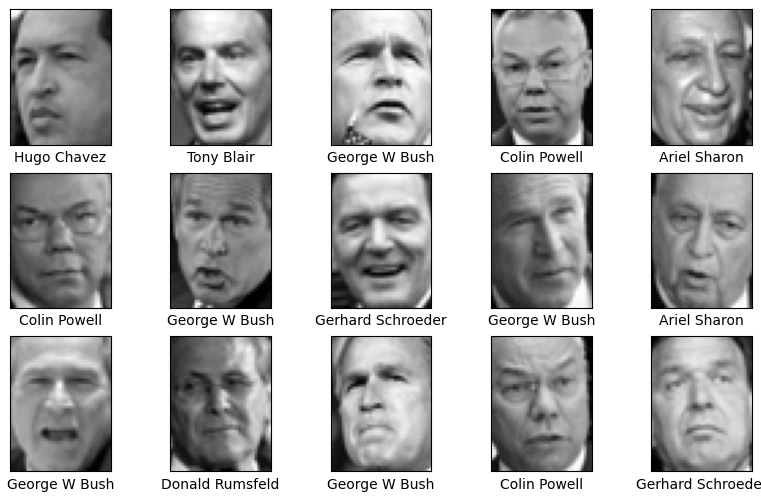

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Explore the dataset
print(f"Total dataset size: {len(lfw_people.images)} images")
print(f"Number of classes: {len(lfw_people.target_names)}")

# Display some sample images
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(lfw_people.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[lfw_people.target[i]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Flatten the images into feature vectors
X = lfw_people.data
y = lfw_people.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 966
Testing samples: 322


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Reduce dimensionality using PCA (Principal Component Analysis)
pca = PCA(n_components=150, whiten=True, random_state=42)

# Create an SVM classifier
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline that combines PCA and SVM
model = make_pipeline(pca, svc)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.54      0.70        13
     Colin Powell       0.66      0.98      0.79        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.84       322
        macro avg       0.91      0.72      0.78       322
     weighted avg       0.87      0.84      0.84       322



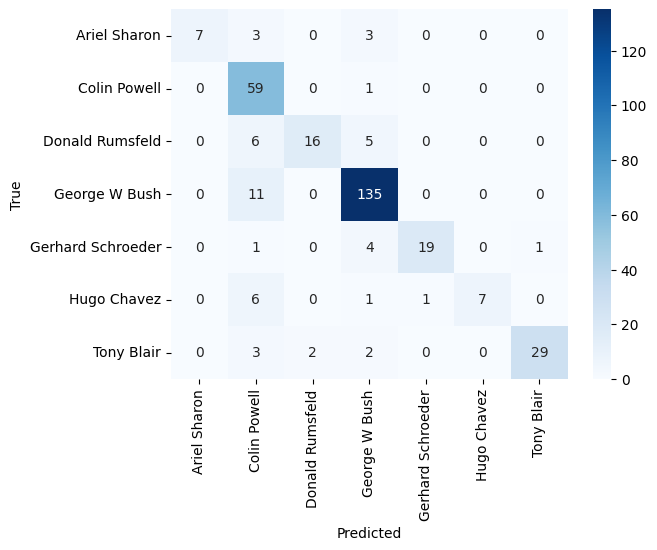

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

# Plot confusion matrix
import seaborn as sns
import numpy as np

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import cv2
import numpy as np

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to recognize faces in real-time
def recognize_faces():
    # Start webcam
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Extract face region
            face = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (lfw_people.images.shape[2], lfw_people.images.shape[1]))

            # Flatten the face image
            face_vector = face_resized.flatten()

            # Predict the label
            label = model.predict([face_vector])[0]

            # Draw rectangle and label
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, lfw_people.target_names[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        # Display the frame
        cv2.imshow('Face Recognition', frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

# Run the face recognition function
recognize_faces()

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'face_recognition_model.joblib')

# Load the model
loaded_model = joblib.load('face_recognition_model.joblib')

In [ ]:
recognize_faces()

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.54      0.70        13
     Colin Powell       0.66      0.98      0.79        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.84       322
        macro avg       0.91      0.72      0.78       322
     weighted avg       0.87      0.84      0.84       322



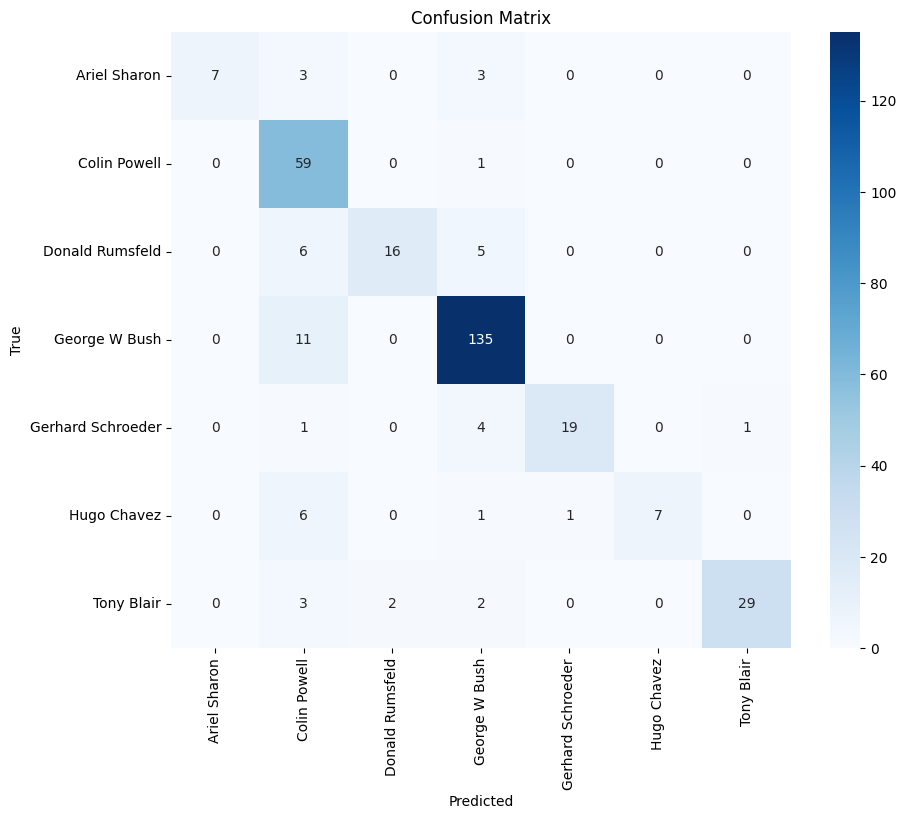

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

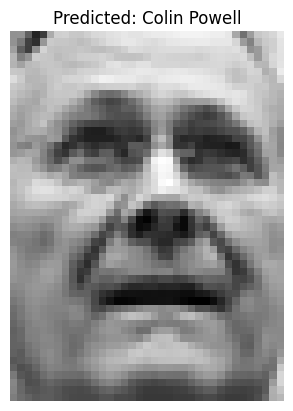

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test set
idx = np.random.randint(0, X_test.shape[0])
test_image = X_test[idx].reshape(lfw_people.images.shape[1], lfw_people.images.shape[2])

# Predict the label
predicted_label = model.predict([X_test[idx]])[0]

# Display the image and prediction
plt.imshow(test_image, cmap='gray')
plt.title(f"Predicted: {lfw_people.target_names[predicted_label]}")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.84 ± 0.01


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'pca__n_components': [100, 150, 200],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1]
}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid.best_params_}")

# Evaluate the best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=lfw_people.target_names))

Best Parameters: {'pca__n_components': 100, 'svc__C': 1, 'svc__gamma': 0.01}
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.82        13
     Colin Powell       0.77      0.97      0.86        60
  Donald Rumsfeld       0.80      0.59      0.68        27
    George W Bush       0.87      0.94      0.90       146
Gerhard Schroeder       0.90      0.76      0.83        25
      Hugo Chavez       0.91      0.67      0.77        15
       Tony Blair       0.90      0.72      0.80        36

         accuracy                           0.85       322
        macro avg       0.88      0.76      0.81       322
     weighted avg       0.86      0.85      0.85       322



In [ ]:
!pip install ipython opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
recognize_faces()